In [1]:
# Importing the libraries
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
# Importing News Datasets
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

In [3]:
# Features and Target Extraction
sentences= twenty_train.data
y=twenty_train.target

In [4]:
# Tokenizing data
tokenizer = Tokenizer(num_words=2000)

In [5]:
# Preprocessing the data
from keras.preprocessing.sequence import pad_sequences
max_review_len= max([len(s.split()) for s in sentences])
vocab_size= len(tokenizer.word_index)+1
sentencesPre = tokenizer.texts_to_sequences(sentences)
padded_docs= pad_sequences(sentencesPre,maxlen=max_review_len)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

In [6]:
# Model Implementation
from keras.layers import Embedding, Flatten
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=max_review_len))
model.add(Flatten())
model.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
model.add(layers.Dense(20, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [7]:
history = model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

# Model Evaluation
[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Epoch 1/5
34/34 [==============================] - 247s 7s/step - loss: 16.9501 - acc: 0.0502 - val_loss: 2.9959 - val_acc: 0.0516
Epoch 2/5
34/34 [==============================] - 243s 7s/step - loss: 2.9980 - acc: 0.0504 - val_loss: 2.9956 - val_acc: 0.0516
Epoch 3/5
34/34 [==============================] - 243s 7s/step - loss: 2.9956 - acc: 0.0501 - val_loss: 2.9950 - val_acc: 0.0516
Epoch 4/5
34/34 [==============================] - 242s 7s/step - loss: 2.9951 - acc: 0.0521 - val_loss: 2.9945 - val_acc: 0.0516
Epoch 5/5
89/89 [==============================] - 31s 346ms/step - loss: 2.9940 - acc: 0.0516
Evaluation result on Test Data : Loss = 2.9939870834350586, accuracy = 0.05160834267735481


In [8]:
# Predicting the Value for test sample
pred = model.predict_classes(X_test[[2],:])
print("Actual Prediction",y_test[1],"Predicted Prediction", pred)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Actual Prediction 6 Predicted Prediction [15]


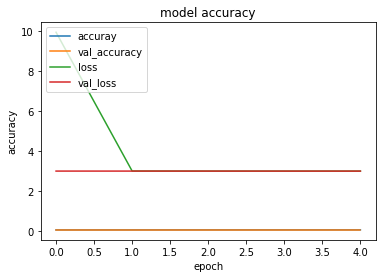

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'val_accuracy','loss','val_loss'], loc='upper left')
plt.show()